In [1]:
import numpy as np
from cardiac_rythm.hyper_tune import CNNTuner, RandomSearchOptimization

rng = np.random.RandomState(0)
tuner = RandomSearchOptimization(
    rng,
    n_folds=10,
    hypermodel=CNNTuner(
        n_filters=5,
        filter_choice=[5, 10, 15, 20, 25, 30, 40, 50],
        kernel_choice= [5, 10, 15, 20, 25, 30, 40, 50],
        dropout_choice= (0.1, 0.9),
        pool_choice=[2],
        stride =1,
        n_fc=2,
        fc_choice=[16, 32, 64, 128],
    ),
    objective="val_loss", 
    max_trials=100,
    directory="../results",
    project_name="n_filters=5_n_fc=2",
    overwrite=False,
)

2023-11-01 12:12:43.238909: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-01 12:12:43.374174: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-01 12:12:43.375203: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-01 12:12:44.608990: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Using TensorFlow backend
Reloading Tuner from ../results/n_filters=5_n_fc=2/tuner0.json


In [2]:
models = tuner.get_best_models(10)
for model in models:
    print(model.config)

CNNConfig(filters=[40, 50, 50, 40, 20], kernels=[40, 40, 40, 10, 20], strides=[1, 1, 1, 1, 1], pool=[2, 2, 2, 2, 2], padding='valid', fc_end=[16, 16], dropout=0.4)
CNNConfig(filters=[50, 40, 30, 40, 20], kernels=[30, 25, 50, 30, 25], strides=[1, 1, 1, 1, 1], pool=[2, 2, 2, 2, 2], padding='valid', fc_end=[128, 64], dropout=0.4)
CNNConfig(filters=[30, 50, 20, 5, 50], kernels=[25, 20, 5, 10, 10], strides=[1, 1, 1, 1, 1], pool=[2, 2, 2, 2, 2], padding='valid', fc_end=[64, 32], dropout=0.1)
CNNConfig(filters=[50, 15, 15, 30, 50], kernels=[15, 25, 30, 15, 20], strides=[1, 1, 1, 1, 1], pool=[2, 2, 2, 2, 2], padding='valid', fc_end=[64, 128], dropout=0.2)
CNNConfig(filters=[40, 40, 10, 40, 10], kernels=[40, 25, 10, 25, 30], strides=[1, 1, 1, 1, 1], pool=[2, 2, 2, 2, 2], padding='valid', fc_end=[64, 32], dropout=0.30000000000000004)
CNNConfig(filters=[50, 15, 20, 25, 30], kernels=[10, 15, 20, 20, 15], strides=[1, 1, 1, 1, 1], pool=[2, 2, 2, 2, 2], padding='valid', fc_end=[64, 64], dropout=0.300

In [3]:
for params in tuner.get_best_hyperparameters(5):
    print(params.values)

{'pool': 2, 'filters0': 40, 'kernels0': 40, 'filters1': 50, 'kernels1': 40, 'filters2': 50, 'kernels2': 40, 'filters3': 40, 'kernels3': 10, 'filters4': 20, 'kernels4': 20, 'fc0': 16, 'fc1': 16, 'dropout': 0.4}
{'pool': 2, 'filters0': 50, 'kernels0': 30, 'filters1': 40, 'kernels1': 25, 'filters2': 30, 'kernels2': 50, 'filters3': 40, 'kernels3': 30, 'filters4': 20, 'kernels4': 25, 'fc0': 128, 'fc1': 64, 'dropout': 0.4}
{'pool': 2, 'filters0': 30, 'kernels0': 25, 'filters1': 50, 'kernels1': 20, 'filters2': 20, 'kernels2': 5, 'filters3': 5, 'kernels3': 10, 'filters4': 50, 'kernels4': 10, 'fc0': 64, 'fc1': 32, 'dropout': 0.1}
{'pool': 2, 'filters0': 50, 'kernels0': 15, 'filters1': 15, 'kernels1': 25, 'filters2': 15, 'kernels2': 30, 'filters3': 30, 'kernels3': 15, 'filters4': 50, 'kernels4': 20, 'fc0': 64, 'fc1': 128, 'dropout': 0.2}
{'pool': 2, 'filters0': 40, 'kernels0': 40, 'filters1': 40, 'kernels1': 25, 'filters2': 10, 'kernels2': 10, 'filters3': 40, 'kernels3': 25, 'filters4': 10, 'ker

In [4]:
tuner.results_summary()

Results summary
Results in ../results/n_filters=5_n_fc=2
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 010 summary
Hyperparameters:
pool: 2
filters0: 40
kernels0: 40
filters1: 50
kernels1: 40
filters2: 50
kernels2: 40
filters3: 40
kernels3: 10
filters4: 20
kernels4: 20
fc0: 16
fc1: 16
dropout: 0.4
Score: 0.20330690890550612

Trial 060 summary
Hyperparameters:
pool: 2
filters0: 50
kernels0: 30
filters1: 40
kernels1: 25
filters2: 30
kernels2: 50
filters3: 40
kernels3: 30
filters4: 20
kernels4: 25
fc0: 128
fc1: 64
dropout: 0.4
Score: 0.20401793271303176

Trial 018 summary
Hyperparameters:
pool: 2
filters0: 30
kernels0: 25
filters1: 50
kernels1: 20
filters2: 20
kernels2: 5
filters3: 5
kernels3: 10
filters4: 50
kernels4: 10
fc0: 64
fc1: 32
dropout: 0.1
Score: 0.20720490217208862

Trial 026 summary
Hyperparameters:
pool: 2
filters0: 50
kernels0: 15
filters1: 15
kernels1: 25
filters2: 15
kernels2: 30
filters3: 30
kernels3: 15
filters4: 50
kernels4: 20
fc0: 64
fc1: 

In [5]:
from sklearn import model_selection
from cardiac_rythm import preprocessing


rng = np.random.RandomState(0)
# Load data and create dataframe
df = preprocessing.load_data("/home/halli/ux/BMDLab/matlab/resprog/GUI/CleanCutsDL/cutDataCinCTTI_rev_v2.mat")


x = np.stack(df["s_ecg"].to_numpy())
x = x.reshape((*x.shape, 1))
y = df["c_label"].to_numpy()
y = y - 1  # 0-4 instead of 1-5

x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x,
    y,
    test_size=0.1,
    random_state=rng,
    stratify=y,
)

In [6]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, balanced_accuracy_score
import seaborn as sns

def get_metrics(y_test, prediction) -> None:
    conf_matrix = confusion_matrix(y_test, prediction)
    norm = conf_matrix.astype("float") / conf_matrix.sum(axis=1)[:, np.newaxis]
    bac = balanced_accuracy_score(y_test, prediction)

    # f, ax = plt.subplots(figsize=(4, 4))
    # sns.heatmap(norm, annot=True, linewidths=0.01, cmap="Oranges", linecolor="gray")
    # ax.xaxis.set_ticklabels(["AS", "PEA", "PR", "VF", "VT"])
    # ax.yaxis.set_ticklabels(["AS", "PEA", "PR", "VF", "VT"])
    # plt.xlabel("Predicted Label")
    # plt.ylabel("True Label")
    # plt.title("Confusion Matrix")
    # plt.show()

    accuracy = conf_matrix.diagonal().sum()/conf_matrix.sum()
    precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)
    recall = conf_matrix.diagonal()/conf_matrix.sum(axis=1)

    # print(f"{accuracy=}, {bac=}\n{precision=}\n{recall=}")
    return accuracy, bac

In [7]:
for model in models:
    prediction = np.argmax(model.predict(x_test), axis=1)
    get_metrics(y_test, prediction)

9/9 [==============================] - 0s 7ms/step


In [17]:
import os
from pathlib import Path

from cardiac_rythm.models import CNN, CNNConfig
best_acc = 0
best_bac = 0

res_dir = Path("../results/n_filters=5_n_fc=2/")
results = []
for dir in res_dir.glob("trial_*"):
    with open(dir / "model_config.json") as f:
        conf = CNNConfig.from_json(f.read())
        model = CNN(conf)
        try:
            model.load_weights(dir / "checkpoint").expect_partial()
            prediction = np.argmax(model.predict(x_test), axis=1)
            acc, bac = get_metrics(y_test, prediction)
            results.append(get_metrics(y_test, prediction))
            if acc > best_acc:
                print(f"Best acc: {acc}")
                best_acc = acc
                best_model = model
            if bac > best_bac:
                print(f"Best bac: {acc}")
                best_bac = bac
        except:
            results.append((0, 0))

9/9 [==============================] - 0s 8ms/step
Best acc: 0.8873239436619719
Best bac: 0.8873239436619719
9/9 [==============================] - 0s 13ms/step
Best acc: 0.8908450704225352
9/9 [==============================] - 0s 8ms/step
Best acc: 0.9119718309859155
Best bac: 0.9119718309859155
9/9 [==============================] - 0s 7ms/step
Best bac: 0.9014084507042254
9/9 [==============================] - 0s 8ms/step


/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)
/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)


9/9 [==============================] - 1s 17ms/step
Best bac: 0.9084507042253521
9/9 [==============================] - 0s 4ms/step


/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)
/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)


9/9 [==============================] - 0s 8ms/step
Best acc: 0.9154929577464789
9/9 [==============================] - 0s 5ms/step
Best acc: 0.9401408450704225
Best bac: 0.9401408450704225
9/9 [==============================] - 0s 8ms/step


/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)
/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)


9/9 [==============================] - 0s 6ms/step


/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)
/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)


9/9 [==============================] - 0s 6ms/step


/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)
/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)


9/9 [==============================] - 0s 6ms/step


/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)
/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)


9/9 [==============================] - 1s 7ms/step


/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)
/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)


9/9 [==============================] - 0s 6ms/step


/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)
/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)


9/9 [==============================] - 0s 5ms/step


/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)
/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)


9/9 [==============================] - 0s 4ms/step


/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)
/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)


9/9 [==============================] - 0s 5ms/step


/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)
/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)


9/9 [==============================] - 0s 10ms/step


/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)
/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)


9/9 [==============================] - 0s 7ms/step


/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)
/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)


9/9 [==============================] - 0s 6ms/step


/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)
/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)


9/9 [==============================] - 0s 4ms/step


/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)
/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)


9/9 [==============================] - 0s 5ms/step


/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)
/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)


9/9 [==============================] - 0s 9ms/step


/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)
/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)


9/9 [==============================] - 0s 10ms/step


/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)
/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)


9/9 [==============================] - 0s 5ms/step


/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)
/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)


9/9 [==============================] - 0s 5ms/step


/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)
/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)


9/9 [==============================] - 0s 5ms/step


/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)
/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)


9/9 [==============================] - 0s 6ms/step


/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)
/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)


9/9 [==============================] - 0s 5ms/step


/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)
/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)


9/9 [==============================] - 0s 6ms/step


/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)
/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)


9/9 [==============================] - 0s 13ms/step


/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)
/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)


9/9 [==============================] - 0s 8ms/step


/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)
/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)


9/9 [==============================] - 0s 6ms/step


/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)
/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)


9/9 [==============================] - 0s 5ms/step
Best acc: 0.9436619718309859
Best bac: 0.9436619718309859
9/9 [==============================] - 0s 5ms/step


/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)
/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)


9/9 [==============================] - 0s 8ms/step


/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)
/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)


9/9 [==============================] - 0s 5ms/step


/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)
/tmp/ipykernel_2833/134903536.py:20: RuntimeWarning: invalid value encountered in divide
  precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)


9/9 [==============================] - 0s 7ms/step


[(0.8873239436619719, 0.8639762794750008), (0.7429577464788732, 0.7418243819266837), (0.8908450704225352, 0.8420791995728057), (0, 0), (0.9119718309859155, 0.8942343760246573), (0.9014084507042254, 0.8947042897426529), (0, 0), (0.8943661971830986, 0.8781171599074412), (0, 0), (0.3204225352112676, 0.2), (0.9084507042253521, 0.9119316489137461), (0, 0), (0.7183098591549296, 0.6585923198710922), (0.3204225352112676, 0.2), (0.9154929577464789, 0.8721143306821055), (0.9401408450704225, 0.9538716356107659), (0.9190140845070423, 0.918107791611628), (0.9190140845070423, 0.8810760424571166), (0.9295774647887324, 0.9381285892283335), (0.3204225352112676, 0.2), (0.8767605633802817, 0.8250620649597632), (0.3204225352112676, 0.2), (0.3204225352112676, 0.2), (0.3626760563380282, 0.2863194776238255), (0.3204225352112676, 0.2), (0.5528169014084507, 0.5172288580984233), (0.9225352112676056, 0.8971615937344838), (0, 0), (0, 0), (0.3204225352112676, 0.2), (0.8908450704225352, 0.8464620630861039), (0.9154

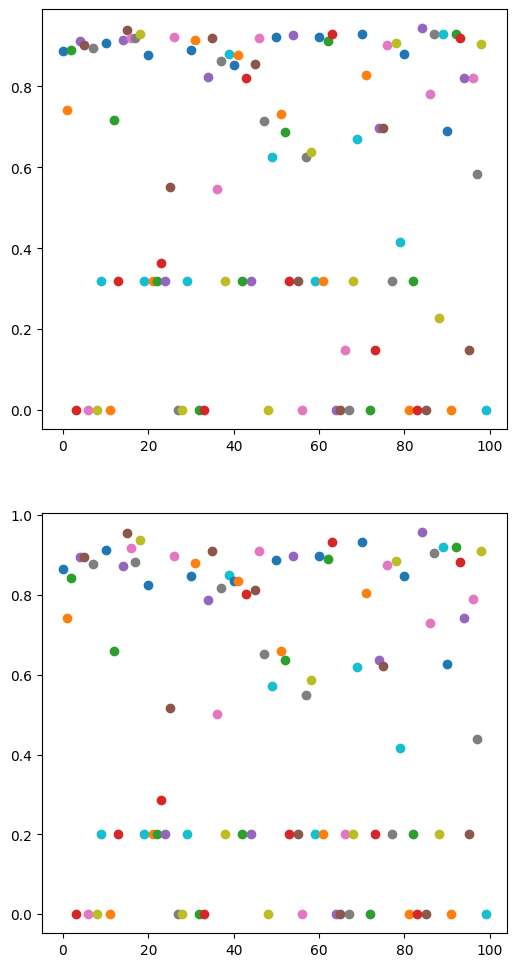

In [18]:
print(results)
f, ax = plt.subplots(2, figsize=(6, 12))
for i, (acc, bac) in enumerate(results):
    ax[0].scatter(i, acc)
    ax[1].scatter(i, bac)


In [19]:
best_acc = 0
best_bac = 0
for i, (acc, bac) in enumerate(results):
    if acc > best_acc:
        print(f"Best acc: {acc} - {i}")
        best_acc = acc
    if bac > best_bac:
        print(f"Best bac: {acc} - {i}")
        best_bac = bac

Best acc: 0.8873239436619719 - 0
Best bac: 0.8873239436619719 - 0
Best acc: 0.8908450704225352 - 2
Best acc: 0.9119718309859155 - 4
Best bac: 0.9119718309859155 - 4
Best bac: 0.9014084507042254 - 5
Best bac: 0.9084507042253521 - 10
Best acc: 0.9154929577464789 - 14
Best acc: 0.9401408450704225 - 15
Best bac: 0.9401408450704225 - 15
Best acc: 0.9436619718309859 - 84
Best bac: 0.9436619718309859 - 84


In [20]:
# best_model = tuner.get_best_models(1)[0]

In [21]:
prediction = np.argmax(best_model.predict(x_test), axis=1)
prediction_shockable = np.where(prediction<3, 0, 1)
true_shockable = np.where(y_test<3, 0, 1)

9/9 [==============================] - 0s 8ms/step


In [22]:
conf_matrix = confusion_matrix(true_shockable, prediction_shockable)
norm = conf_matrix.astype("float") / conf_matrix.sum(axis=1)[:, np.newaxis]
balanced_accuracy_score(true_shockable, prediction_shockable)


0.9900990099009901

In [24]:
conf_matrix = confusion_matrix(y_test, prediction)
norm = conf_matrix.astype("float") / conf_matrix.sum(axis=1)[:, np.newaxis]
bac = balanced_accuracy_score(y_test, prediction)
bac

0.956486701704093

In [25]:
model.config

CNNConfig(filters=[15, 40, 50, 10, 20], kernels=[25, 15, 30, 25, 40], strides=[1, 1, 1, 1, 1], pool=[2, 2, 2, 2, 2], padding='valid', fc_end=[16, 32], dropout=0.9)

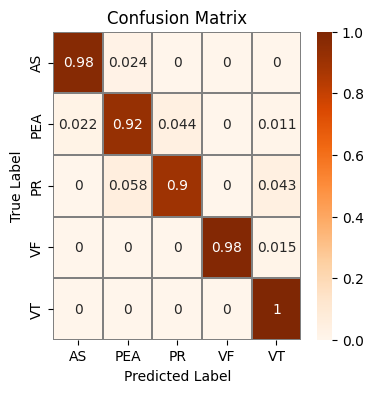

In [26]:
f, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(norm, annot=True, linewidths=0.01, cmap="Oranges", linecolor="gray")
ax.xaxis.set_ticklabels(["AS", "PEA", "PR", "VF", "VT"])
ax.yaxis.set_ticklabels(["AS", "PEA", "PR", "VF", "VT"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [28]:
conf_matrix.diagonal().sum()/conf_matrix.sum()

0.9436619718309859